<div style="text-align: center; background-color: skyblue; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 36px; font-weight: bold; border-radius: 15px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    PROGRAMMING FOR DATA SCIENCE<br>
    @ FIT-HCMUS, VNU-HCM<br>
    FINAL PROJECT 🏫
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 25px; font-size: 20px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    DATA ANALYTICS AND VISUALIZATION - PART 2
</div>
<style>
    div:hover {
        opacity: 0.8;
    }
</style>

### Tải bộ dữ liệu.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Tải dataset
data = pd.read_csv('../Datasets/processed-redwine-quality.csv')

# In ra một số mẫu dữ liệu
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
582,9.8,1.24,0.34,2.0,0.08,32.0,151.0,1.00,3.15,0.53,9.5,5
745,6.8,0.49,0.22,2.3,0.07,13.0,24.0,0.99,3.41,0.83,11.3,6
1055,6.5,0.67,0.00,4.3,0.06,11.0,20.0,0.99,3.45,0.56,11.8,4
22,6.9,0.40,0.14,2.4,0.08,21.0,40.0,1.00,3.43,0.63,9.7,6
438,10.5,0.26,0.47,1.9,0.08,6.0,24.0,1.00,3.18,1.04,10.9,7


In [2]:
max_alcohol = data['alcohol'].max()
print(f"Highest alcohol concentration: {max_alcohol}")

Highest alcohol concentration: 14.9


## Câu hỏi 1: Các yếu tố ảnh hưởng lớn đến chất lượng rượu?

### Mục đích của việc trả lời câu hỏi này
Chúng ta sẽ thực hiện phân tích tương quan giữa các yếu tố (ví dụ như "**fixed acidity**", "**volatile acidity**", "**citric acid**",...) và chất lượng rượu ("**quality**") để nhận diện các yếu tố có ảnh hưởng mạnh nhất đến chất lượng rượu, từ đó giúp người làm rượu tối ưu quy trình sản xuất nhằm đạt chất lượng cao nhất.

### Các bước thực hiện

#### Tiền xử lý dữ liệu

Không có.

#### Analyzing

Các bước phân tích dữ liệu:

* **Tính toán ma trận tương quan**: tính toán ma trận tương quan giữa tất cả các cột trong dữ liệu và sau đó lọc ra chỉ những giá trị tương quan với "**quality**". Điều này giúp ta xác định mức độ ảnh hưởng của từng yếu tố đến chất lượng rượu.

* **Vẽ biểu đồ tương quan**: Sau khi tính toán xong tương quan, ta sẽ vẽ biểu đồ dạng cột để hiển thị mức độ tương quan của từng yếu tố với chất lượng. Các giá trị tương quan cao hơn cho thấy mối liên hệ mạnh hơn với "**quality**".

* **Giải thích kết quả**: Dựa trên biểu đồ, ta có thể thấy rõ ràng yếu tố nào có ảnh hưởng mạnh nhất và yếu tố nào ít ảnh hưởng đến chất lượng. Các yếu tố có tương quan dương cho thấy có mối liên hệ thuận, trong khi các yếu tố có tương quan âm cho thấy có mối liên hệ nghịch.

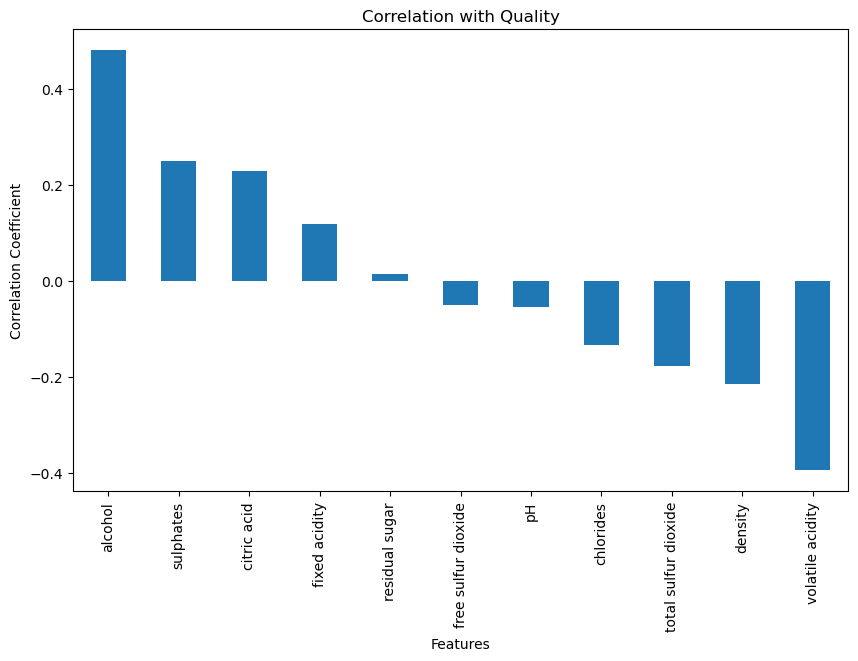

In [3]:
correlation_with_quality = data.corr()
correlation_with_quality = correlation_with_quality['quality'].drop('quality')
correlation_with_quality = correlation_with_quality.sort_values(ascending=False)

correlation_with_quality.plot(kind='bar', figsize=(10, 6))
plt.title('Correlation with Quality')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

#### Kết luận
* **alcohol** có hệ số tương quan là 0.480343, nghĩa là lượng **alcohol** có mối quan hệ dương mạnh với chất lượng rượu.
* **sulphates** (0.248835) và **citric acid** (0.228057) cũng có mối quan hệ dương nhưng yếu hơn.
* Các yếu tố như **volatile acidity** (-0.395214) và **density** (-0.184252) có mối quan hệ tiêu cực mạnh hơn, nghĩa là càng có nhiều acid dễ bay hơi hay mật độ cao thì chất lượng rượu có xu hướng giảm.

## Câu hỏi 2: Tỷ lệ giữa "volatile acidity" và "alcohol" có ảnh hưởng đến "quality" không?

### Mục đích của việc trả lời câu hỏi này
- **Volatile acidity**: Độ axit dễ bay hơi, có thể ảnh hưởng tiêu cực đến hương vị rượu nếu hàm lượng quá cao (gây mùi giấm).
- **Alcohol**: Nồng độ cồn, một yếu tố quan trọng góp phần tạo nên cảm giác đậm đà và hài hòa trong rượu.
- **Mục đích chính**: Phân tích giúp hiểu cách **Volatile acidity** và **alcohol** ảnh hưởng đến chất lượng rượu vang.

### Các bước thực hiện

#### Tiền xử lý dữ liệu
* **Bước 1**: Tạo một cột mới tính tỷ lệ giữa "**volatile acidity**" và "**alcohol**".
* **Bước 2**: Xử lý các giá trị bằng 0 trong cột "**alcohol**" vì nếu "**alcohol**" bằng 0, sẽ gây ra lỗi chia cho 0. Cần xử lý bằng cách thay giá trị 0 bằng một giá trị nhỏ (0.001).
* **Bước 3**: Kiểm tra dữ liệu có giá trị bị thiếu (missing values) hay không.
* **Bước 4**: Kiểm tra và loại bỏ các giá trị ngoại lai (outliers). Sử dụng phương pháp IQR (Interquartile Range) để phát hiện và loại bỏ.

In [4]:
# Bước 1: Tạo một cột mới tính tỷ lệ giữa "volatile acidity" và "alcohol"
data.loc[:, 'volatile_alcohol_ratio'] = data['volatile acidity'] / data['alcohol']

# Bước 2: Xử lý các giá trị bằng 0 trong cột "alcohol"
data.loc[:, 'alcohol'] = data['alcohol'].replace(0, 0.001)

# Bước 3: Kiểm tra dữ liệu có giá trị bị thiếu (missing values) hay không
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Define Lower_Fence and Upper_Fence
Q1 = data['volatile_alcohol_ratio'].quantile(0.25)
Q3 = data['volatile_alcohol_ratio'].quantile(0.75)
IQR = Q3 - Q1
Lower_Fence = Q1 - 1.5 * IQR
Upper_Fence = Q3 + 1.5 * IQR

# Bước 4: Kiểm tra và loại bỏ các giá trị ngoại lai (outliers)
outliers = data[(data['volatile_alcohol_ratio'] < Lower_Fence) | (data['volatile_alcohol_ratio'] > Upper_Fence)]
outlier_count = outliers.shape[0]
print(f"Number of outliers: {outlier_count}")

# Loại bỏ các giá trị ngoại lai
data = data[(data['volatile_alcohol_ratio'] >= Lower_Fence) & (data['volatile_alcohol_ratio'] <= Upper_Fence)]
data.reset_index(drop=True, inplace=True)


Missing values in each column:
 fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
volatile_alcohol_ratio    0
dtype: int64
Number of outliers: 9


#### Analyzing

* **Bước 1**: Phân tích tương quan (correlation analysis) giữa cột "**volatile_to_alcohol_ratio**" và "**quality**" để xem độ tương quan.
* **Bước 2**: Sử dụng scatter plot để hiển thị sự phân bố của "**volatile_to_alcohol_ratio**" theo các giá trị "**quality**".

Correlation between volatile_alcohol_ratio and quality: -0.47238736593885433


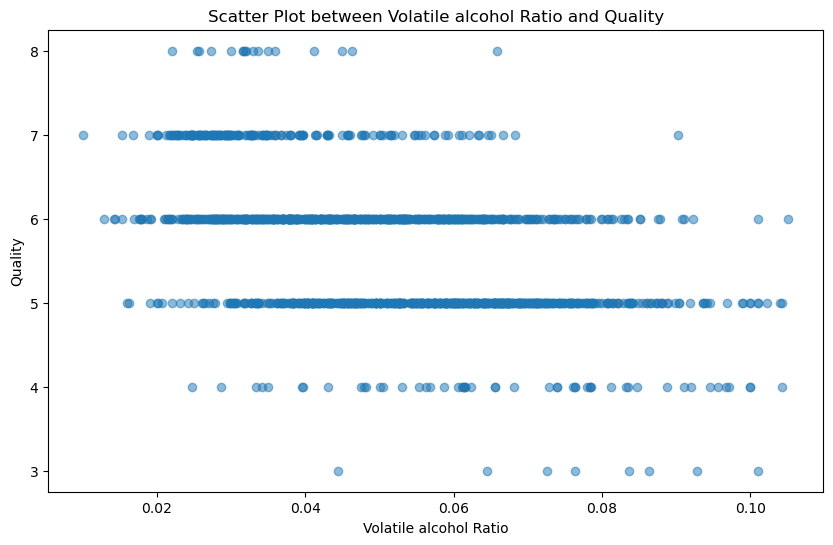

In [5]:
# Bước 1: Phân tích tương quan giữa "volatile_alcohol_ratio" và "quality"
correlation_ratio_quality = data['volatile_alcohol_ratio'].corr(data['quality'])
print(f"Correlation between volatile_alcohol_ratio and quality: {correlation_ratio_quality}")

# Bước 2: Trực quan hóa dữ liệu bằng scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['volatile_alcohol_ratio'], data['quality'], alpha=0.5)
plt.title('Scatter Plot between Volatile alcohol Ratio and Quality')
plt.xlabel('Volatile alcohol Ratio')
plt.ylabel('Quality')
plt.show()

#### Kết luận 
Có vẻ như có một mối quan hệ tiêu cực giữa tỷ lệ **volatile acidity** và **quality**. Khi tỷ lệ **volatile acidity** tăng, **quality** có xu hướng giảm. Điều này phù hợp với nhận định rằng mức **volatile acidity** cao thường gây ảnh hưởng xấu đến hương vị của rượu.